# Usage of proceesing tools available in the nmrToolsLab package

## 1. General Information
This notebook showcases the use of the processing tools included along the way.  Here, the paths need to be adapted to everyone's computer.

3. Addition of consecutive 1Ds in a pseudo2D experiment
4. Linear Baseline correction of 1Ds and pseudo2Ds
5. Polynomial base line correction of 1Ds and pseudo2Ds


## 2. Prepare Script
Load libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nmrtoolslab.processing as processing

## 3. Adding consecutive 1Ds with a shifting window
### 3.1 Load NMR data

In [2]:
data_path = '/Users/cyrilcharlier/Documents/Research/nmrData/'
dataset = '8Carbios_5mm_NPs_ICCGwt_2p5_noTSP_230131'
expno = 12
input_procno = 1

data, dic, udic = processing.read_topspin_data(data_path, dataset, expno, input_procno)

### 3.2 Perform 
Set the number of spectra that you want to add within the shifting window

In [3]:
data_summed = processing.shifting_sum(data, udic, n_spec_wdw=16)

### 3.3 Write data back in TopSpin
Set output_procno

In [4]:
output_procno = 2
processing.write_topspin_pdata(data_path, dataset, expno, output_procno, data_summed,dic)


## 4. Linear Baseline correction Pseudo 2D
### 4.1 Perform baseline correction
Here, we used the data loaded above and apply the baseline correction to the summed data

Set details:
* data: input data
* spec_list: either integer or a list. Default is "False" then it will correct all 1Ds individually
* spec_wdw: values in points defining the range gor baseline correction
* base_type: 'lin' default the poly_order will be set to 1. If higher order are need please refer to the polynomial baseline correction example. 

In [5]:
correction = processing.baseline_correction(data = data_summed, spec_list = False, spec_wdw=[11731,12022],base_type='lin')

### 4.2 Write data back in TopSpin
Set output_procno

In [6]:
output_procno = 3
processing.write_topspin_pdata(data_path, dataset, expno, output_procno, correction.data_bl, dic)

### 4.3 Visualization of baseline corrected data
Set the 1D id that that you want to plot

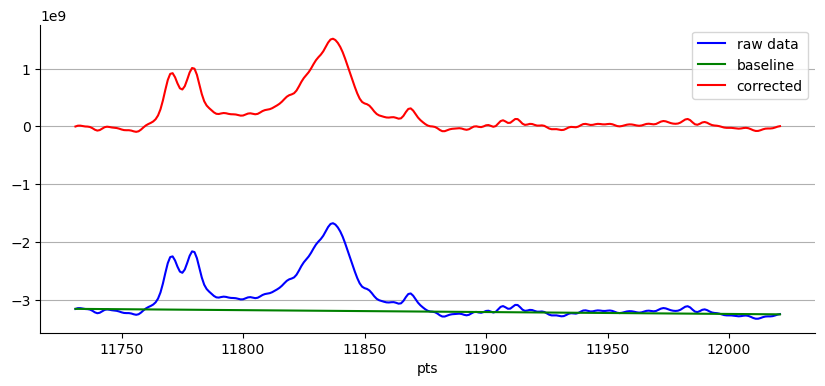

In [7]:
correction.visualize_baseline_correction(200,baseline_correction=True)

We can also visualize the correction of the integral

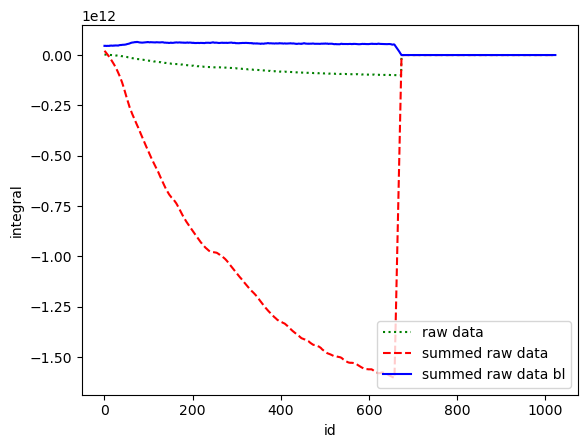

In [9]:
Integral_1 = np.sum(data[:,11731:12022],axis=1)
plt.plot(Integral_1,color='g',ls='dotted',label='raw data')

Integral_2 = np.sum(data_summed[:,11731:12022],axis=1)
plt.plot(Integral_2,color='r',ls='dashed',label='summed raw data')

Integral_1_bl = np.sum(correction.data_bl[:,11731:12022],axis=1)
plt.plot(Integral_1_bl,color='b',ls='-',label='summed raw data bl')

plt.ylabel('integral')
plt.legend(loc="lower right")
plt.xlabel('id')
plt.show()

## 5. Polynomial Baseline correction Pseudo2D
### 5.1 Load NMR data

In [7]:
data_path = '/Users/cyrilcharlier/Documents/Research/nmrData/'
dataset = '8Carbios_3mm_NPs_0p1_ICCGwt_2p5_Pi_2mM_NaAc_0p1mM_230213'
expno = 14
input_procno = 1

data, dic, udic = processing.read_topspin_data(data_path, dataset, expno, input_procno)

### 5.2 Perform baseline correction

Set details:
* data: input data
* spec_list: either integer or a list. Default is "False" then it will correct all 1Ds individually
* spec_wdw: values in points defining the range gor baseline correction
* poly_order: order of the polynomail function used (integer) 

In [8]:
correction = processing.baseline_correction(data = data, spec_list = False, spec_wdw=[8640,10530], poly_order=3)

### 5.3 Write data back in TopSpin

Set output_procno

In [10]:
output_procno = 3
processing.write_topspin_pdata(data_path, dataset, expno, output_procno, correction.data_bl,dic)


### 5.4 Visualization of baseline corrected data
Set the 1D id that that you want to plot

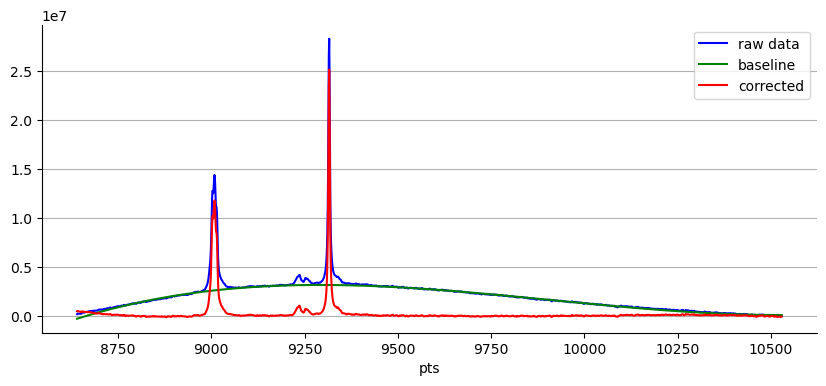

In [11]:
correction.visualize_baseline_correction(25,baseline_correction=True)

In this case we can check the integral as function of time of the not corrected data versus corrected data

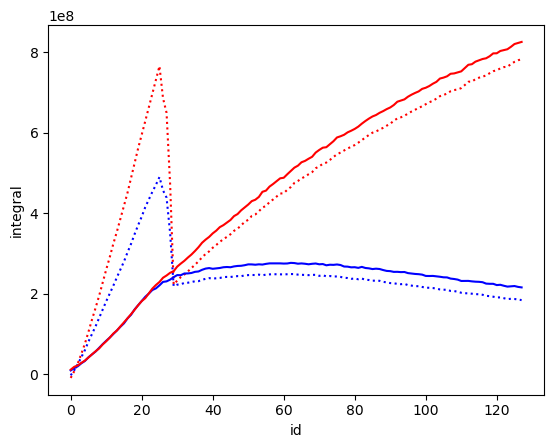

In [12]:
Integral_1 = np.sum(correction.data[:,8962:9065],axis=1)
Integral_2 = np.sum(correction.data[:,9234:9405],axis=1)
plt.plot(Integral_1,color='b',ls='dotted')
plt.plot(Integral_2,color='r',ls='dotted')

Integral_1_bl = np.sum(correction.data_bl[:,8962:9065],axis=1)
Integral_2_bl = np.sum(correction.data_bl[:,9234:9405],axis=1)
plt.plot(Integral_1_bl,color='b',ls='-')
plt.plot(Integral_2_bl,color='r',ls='-')
plt.ylabel('integral')
plt.xlabel('id')
plt.show()


## 5. Baseline correction 1D

The process is identical than for a Pseudo2D experiment in particular for the selection of linear or polynomial function. 

The only differnece is for visuaization in which no id is required.


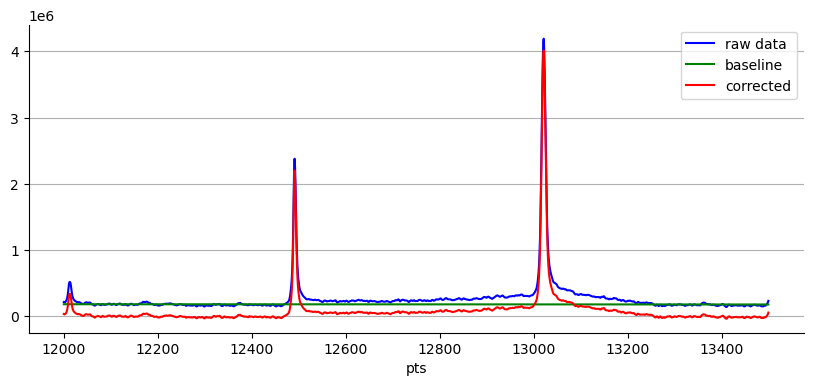

In [3]:
data_path = '/Users/cyrilcharlier/Documents/Research/nmrData/'
dataset = '8Carbios_3mm_NPs_0p1_ICCGwt_2p5_Pi_2mM_NaAc_0p1mM_230213'
expno = 2
input_procno = 1

data, dic, udic = processing.read_topspin_data(data_path, dataset, expno, input_procno)
correction = processing.baseline_correction(data = data, spec_list = False, spec_wdw=[12000,13500], base_type='lin')

#by default the integer is 
correction.visualize_baseline_correction(baseline_correction=True)

output_procno = 3
processing.write_topspin_pdata(data_path, dataset, expno, output_procno, correction.data_bl,dic)

